In [3]:
from shapely.geometry import shape
import geopandas as gpd
import pandas as pd

# 讀取 JSON 文件
data = pd.read_json('../data/tw_city.json')

# 提取 features 欄位中的地理資訊和屬性
features = data['features']
properties = features.apply(lambda x: x['properties'])
geometries = features.apply(lambda x: shape(x['geometry']))

# 將屬性和幾何資料轉換為 GeoDataFrame
gdf = gpd.GeoDataFrame(properties, geometry=geometries)

gdf

,features,geometry
0,"{'COUNTYSN': '10014001', 'COUNTYNAME': '台東縣', ...","MULTIPOLYGON (((121.60104 22.01792, 121.60112 ..."
1,"{'COUNTYSN': '10002001', 'COUNTYNAME': '宜蘭縣', ...","MULTIPOLYGON (((121.87445 24.53563, 121.87448 ..."
2,"{'COUNTYSN': '63000001', 'COUNTYNAME': '台北市', ...","POLYGON ((121.55916 25.21013, 121.55952 25.210..."
3,"{'COUNTYSN': '10009001', 'COUNTYNAME': '雲林縣', ...","MULTIPOLYGON (((120.1301 23.5689, 120.12985 23..."
4,"{'COUNTYSN': '10003001', 'COUNTYNAME': '桃園縣', ...","POLYGON ((121.1898 25.09362, 121.18978 25.0937..."
5,"{'COUNTYSN': '10013001', 'COUNTYNAME': '屏東縣', ...","MULTIPOLYGON (((120.70254 22.05566, 120.70261 ..."
6,"{'COUNTYSN': '10006001', 'COUNTYNAME': '台中市', ...","MULTIPOLYGON (((120.52978 24.31569, 120.52978 ..."
7,"{'COUNTYSN': '10011001', 'COUNTYNAME': '台南市', ...","POLYGON ((120.57824 23.21478, 120.57833 23.214..."
8,"{'COUNTYSN': '10017001', 'COUNTYNAME': '基隆市', ...","MULTIPOLYGON (((121.78196 25.18914, 121.7819 2..."
9,"{'COUNTYSN': '09007001', 'COUNTYNAME': '連江縣', ...","MULTIPOLYGON (((119.97044 26.16379, 119.97043 ..."


In [4]:
# 假設 gdf 是包含所有地理要素的 GeoDataFrame
# 提取 'features' 中的 '名稱' 欄位
gdf['名稱'] = gdf['features'].apply(lambda x: x['COUNTYNAME'])

# 定義六都名稱
six_metros = ['台北市', '新北市', '桃園縣', '台中市', '台南市', '高雄市']

# 使用 str.contains 篩選六都的資料
six_metros_gdf = gdf[gdf['名稱'].str.contains('|'.join(six_metros))]

# 查看篩選結果
six_metros_gdf


,features,geometry,名稱
2,"{'COUNTYSN': '63000001', 'COUNTYNAME': '台北市', ...","POLYGON ((121.55916 25.21013, 121.55952 25.210...",台北市
4,"{'COUNTYSN': '10003001', 'COUNTYNAME': '桃園縣', ...","POLYGON ((121.1898 25.09362, 121.18978 25.0937...",桃園縣
6,"{'COUNTYSN': '10006001', 'COUNTYNAME': '台中市', ...","MULTIPOLYGON (((120.52978 24.31569, 120.52978 ...",台中市
7,"{'COUNTYSN': '10011001', 'COUNTYNAME': '台南市', ...","POLYGON ((120.57824 23.21478, 120.57833 23.214...",台南市
15,"{'COUNTYSN': '10001001', 'COUNTYNAME': '新北市', ...","MULTIPOLYGON (((121.5389 25.30113, 121.53893 2...",新北市
17,"{'COUNTYSN': '10012001', 'COUNTYNAME': '高雄市', ...","POLYGON ((120.45431 22.77177, 120.4541 22.7711...",高雄市


In [6]:
import matplotlib.pyplot as plt

df_population = pd.read_csv("../data/popularity_city_109.csv")

# 移除六都名稱的前綴
six_metros_gdf['縣市名稱'] = six_metros_gdf['名稱']
six_metros_gdf['縣市名稱'] = six_metros_gdf['縣市名稱'].str.replace("台", '臺')
six_metros_gdf['縣市名稱'] = six_metros_gdf['縣市名稱'].str.replace("桃園縣", '桃園市')

# 合併資料
six_metros_gdf = six_metros_gdf.merge(df_population, left_on='縣市名稱', right_on='縣市名稱', how='left')

# 輸出篩選結果為 GeoJSON 檔案
output_geojson = '../geojson/tw_city_109.geojson'
six_metros_gdf.to_file(output_geojson, driver='GeoJSON')

d:\Anaconda\envs\intern\lib\site-packages\pyogrio\raw.py:698: UserWarning: 'crs' was not provided.  The output dataset will not have projection information defined and may not be usable in other systems.
  warnings.warn(


In [ ]:
six_metros_gdf

,features,geometry,名稱,縣市名稱,縣市代碼,性比例,戶量,人口密度,扶養比,扶幼比,扶老比,老化指數,資料時間
0,"{'COUNTYSN': '63000001', 'COUNTYNAME': '台北市', ...","POLYGON ((121.55916 25.21013, 121.55952 25.210...",台北市,臺北市,63000,90.86,2.47,9654.69,46.76,19.55,27.20,139.13,109Y06M
1,"{'COUNTYSN': '10003001', 'COUNTYNAME': '桃園縣', ...","POLYGON ((121.1898 25.09362, 121.18978 25.0937...",桃園縣,桃園市,68000,98.37,2.71,1849.45,37.45,20.26,17.19,84.82,109Y06M
2,"{'COUNTYSN': '10006001', 'COUNTYNAME': '台中市', ...","MULTIPOLYGON (((120.52978 24.31569, 120.52978 ...",台中市,臺中市,66000,96.62,2.84,1271.81,37.69,19.44,18.24,93.82,109Y06M
3,"{'COUNTYSN': '10011001', 'COUNTYNAME': '台南市', ...","POLYGON ((120.57824 23.21478, 120.57833 23.214...",台南市,臺南市,67000,99.27,2.69,856.84,39.13,16.73,22.39,133.84,109Y06M
4,"{'COUNTYSN': '10001001', 'COUNTYNAME': '新北市', ...","MULTIPOLYGON (((121.5389 25.30113, 121.53893 2...",新北市,新北市,65000,95.48,2.53,1961.76,36.85,16.49,20.36,123.48,109Y06M
5,"{'COUNTYSN': '10012001', 'COUNTYNAME': '高雄市', ...","POLYGON ((120.45431 22.77177, 120.4541 22.7711...",高雄市,高雄市,64000,97.46,2.49,939.02,38.85,16.33,22.52,137.85,109Y06M


In [7]:
# 假設 gdf 是包含所有地理要素的 GeoDataFrame
# 提取 'features' 中的 '名稱' 欄位
gdf['名稱'] = gdf['features'].apply(lambda x: x['COUNTYNAME'])

# 移除六都名稱的前綴
gdf['縣市名稱'] = gdf['名稱']
gdf['縣市名稱'] = gdf['縣市名稱'].str.replace("台", '臺')
gdf['縣市名稱'] = gdf['縣市名稱'].str.replace("桃園縣", '桃園市')

# 合併資料
gdf = gdf.merge(df_population, left_on='縣市名稱', right_on='縣市名稱', how='left')

# 輸出篩選結果為 GeoJSON 檔案
output_geojson = '../geojson/tw_city_all_109.geojson'
gdf.to_file(output_geojson, driver='GeoJSON')


d:\Anaconda\envs\intern\lib\site-packages\pyogrio\raw.py:698: UserWarning: 'crs' was not provided.  The output dataset will not have projection information defined and may not be usable in other systems.
  warnings.warn(


In [ ]:
gdf

,features,geometry,名稱,縣市名稱,縣市代碼,性比例,戶量,人口密度,扶養比,扶幼比,扶老比,老化指數,資料時間
0,"{'COUNTYSN': '10014001', 'COUNTYNAME': '台東縣', ...","MULTIPOLYGON (((121.60104 22.01792, 121.60112 ...",台東縣,臺東縣,10014,105.95,2.59,61.43,40.04,16.11,23.93,148.55,109Y06M
1,"{'COUNTYSN': '10002001', 'COUNTYNAME': '宜蘭縣', ...","MULTIPOLYGON (((121.87445 24.53563, 121.87448 ...",宜蘭縣,宜蘭縣,10002,101.71,2.65,211.74,40.22,16.50,23.72,143.73,109Y06M
2,"{'COUNTYSN': '63000001', 'COUNTYNAME': '台北市', ...","POLYGON ((121.55916 25.21013, 121.55952 25.210...",台北市,臺北市,63000,90.86,2.47,9654.69,46.76,19.55,27.20,139.13,109Y06M
3,"{'COUNTYSN': '10009001', 'COUNTYNAME': '雲林縣', ...","MULTIPOLYGON (((120.1301 23.5689, 120.12985 23...",雲林縣,雲林縣,10009,107.25,2.80,526.23,42.82,15.98,26.84,167.97,109Y06M
4,"{'COUNTYSN': '10003001', 'COUNTYNAME': '桃園縣', ...","POLYGON ((121.1898 25.09362, 121.18978 25.0937...",桃園縣,桃園市,68000,98.37,2.71,1849.45,37.45,20.26,17.19,84.82,109Y06M
5,"{'COUNTYSN': '10013001', 'COUNTYNAME': '屏東縣', ...","MULTIPOLYGON (((120.70254 22.05566, 120.70261 ...",屏東縣,屏東縣,10013,103.96,2.81,293.91,39.01,14.54,24.47,168.27,109Y06M
6,"{'COUNTYSN': '10006001', 'COUNTYNAME': '台中市', ...","MULTIPOLYGON (((120.52978 24.31569, 120.52978 ...",台中市,臺中市,66000,96.62,2.84,1271.81,37.69,19.44,18.24,93.82,109Y06M
7,"{'COUNTYSN': '10011001', 'COUNTYNAME': '台南市', ...","POLYGON ((120.57824 23.21478, 120.57833 23.214...",台南市,臺南市,67000,99.27,2.69,856.84,39.13,16.73,22.39,133.84,109Y06M
8,"{'COUNTYSN': '10017001', 'COUNTYNAME': '基隆市', ...","MULTIPOLYGON (((121.78196 25.18914, 121.7819 2...",基隆市,基隆市,10017,99.55,2.38,2775.92,37.59,14.18,23.41,165.06,109Y06M
9,"{'COUNTYSN': '09007001', 'COUNTYNAME': '連江縣', ...","MULTIPOLYGON (((119.97044 26.16379, 119.97043 ...",連江縣,連江縣,9007,134.31,3.94,453.09,31.69,15.37,16.32,106.17,109Y06M


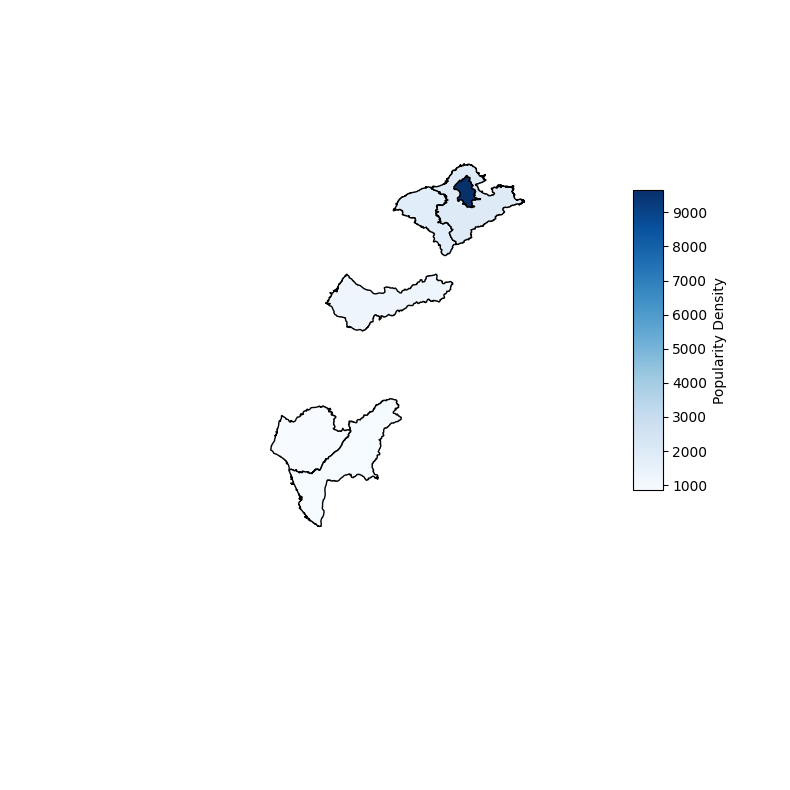

In [32]:
import cartopy.crs as ccrs
import matplotlib.colors as colors

# 台灣附近的經緯度範圍
taiwan_extent = [118, 124, 20.5, 26.5]

# 創建 colorbar
norm = colors.Normalize(vmin=six_metros_gdf['人口密度'].min(), vmax=six_metros_gdf['人口密度'].max())
cbar = plt.cm.ScalarMappable(norm=norm, cmap='Blues')

# 繪製地圖
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent(taiwan_extent, crs=ccrs.PlateCarree())
ax.axis('off')

# 繪製地理數據
six_metros_gdf.plot(column='人口密度', ax=ax, legend=False, cmap='Blues', linewidth=1, edgecolor='black')

# 添加 colorbar 在地圖內部
cbar_ax = fig.add_axes([0.75, 0.4, 0.03, 0.3])  # [left, bottom, width, height]
plt.colorbar(cbar, cax=cbar_ax, orientation='vertical', label='Popularity Density')

# 保存地圖為 PNG 圖像，確保沒有邊框
plt.savefig('popularity_city.png', bbox_inches='tight', pad_inches=0, transparent=True)

# 顯示地圖
plt.show()